# Zernike Fitting Demo with Opticspy

 ### Intro
 #### What are Zernikes?
 In mathematics, the Zernike polynomials are a sequence of polynomials that are orthogonal on the unit disk. Named after optical physicist Frits Zernike, winner of the 1953 Nobel Prize in Physics and the inventor of phase-contrast microscopy, they play an important role in beam optics.
 
 I think of these polynomials as the 2D equivalent of fourier series.  Just like a series of different sinusoidals can be summed up to approximate a 1D series, we can use Zernike's to approximate any 2D surface.  Here's what they look like, in ANSI polynomial notation:
 
 ![image](Zernike_polynomials_ANSI.png)
 
 #### So What?
 We use Zernike polynomials in the Auto-OOF process: corrections needed to improve the surface are computed in terms of Zernike polynomial coefficients.  These coefficients are sent to the Active Surface Manager via it's zernike_coeff paramter.  From these, the displacement of each actuator is easily calculated.
 #### Why are you still talking?
 Our aim in the LASSI project is to do our prototyping data analysis in python.  However, other zernike calculations for the GBT are in either complex C packages ('poof' code base) or Mathematica ('holo-analysis' code base).  The purpose of this notebook is to demonstrate a python package which enables us to use Zernike math in python. 
 So, show me, don't tell me ...

In [2]:
%matplotlib notebook
import matplotlib.pylab as plt


### Import Opticspy and helper test functions

In [3]:
import numpy as np

from mpl_toolkits.mplot3d import axes3d, Axes3D
import opticspy
from test_surface2 import *
from test_surface import spherical_surf

### Create a unit hemisphere from 200 points

Radius:  1.0
Offset:  0.0
Scale:  1.0


<IPython.core.display.Javascript object>


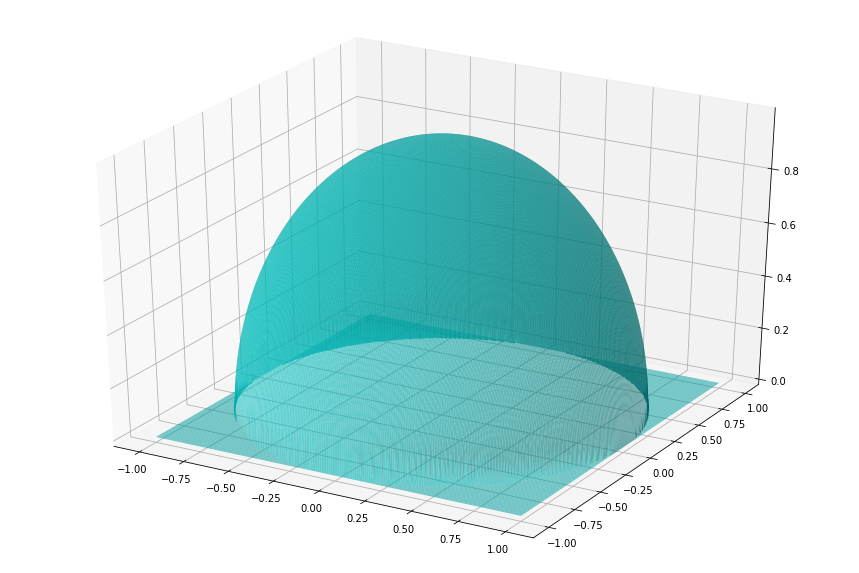

In [3]:
Z = spherical_surf(200)

### Fit this surface up to 12 zernike coefficients
Our result looks sensible!  Our two domineering terms are the Defocus and Primary Spherical, which combined makes a decent enough hemisphere such that our residuals in the 'Remaining Aberration' plot are fairly small.

<IPython.core.display.Javascript object>


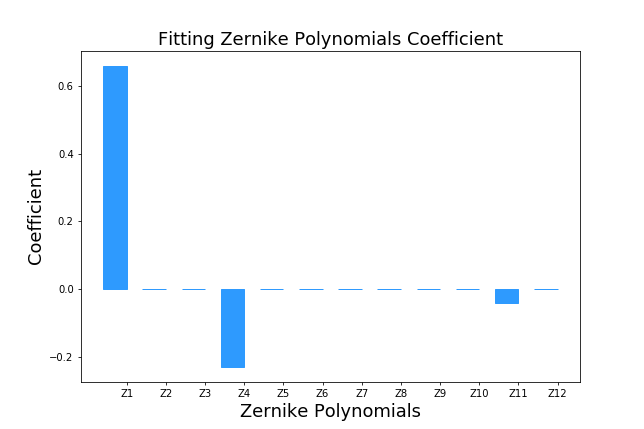

<IPython.core.display.Javascript object>


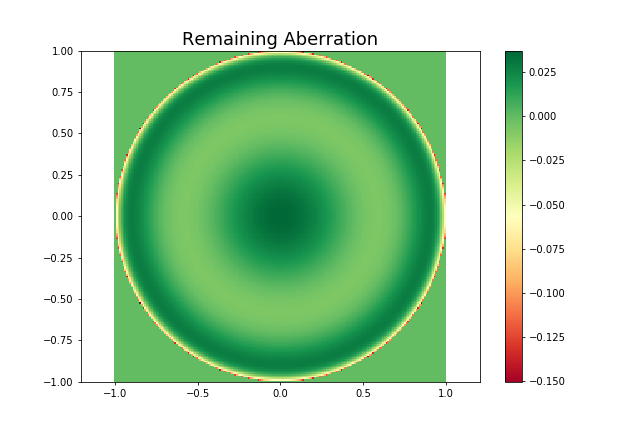

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 | 0.000 | 0.000 |-0.229 |-0.000 |-0.000 | 0.000 | 0.000 |-0.000 |-0.000 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.042 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

In [4]:
fitlist,C1 = opticspy.zernike.fitting(Z,12,remain2D=1,barchart=1)

NOTE: the 'piston' Z1 term is displayed in the barchart, but is treated as zero in the above table as well as C1 and fitslist.

In [5]:
C1.listcoefficient()

Z4 =  -0.229 Z20 Defocus
Z11 =  -0.042 Z40 Primary Spherical


['Z4 = -0.229\nZ11 = -0.042\n', 'Z4 = -0.229  Z11 = -0.042  ']

<IPython.core.display.Javascript object>


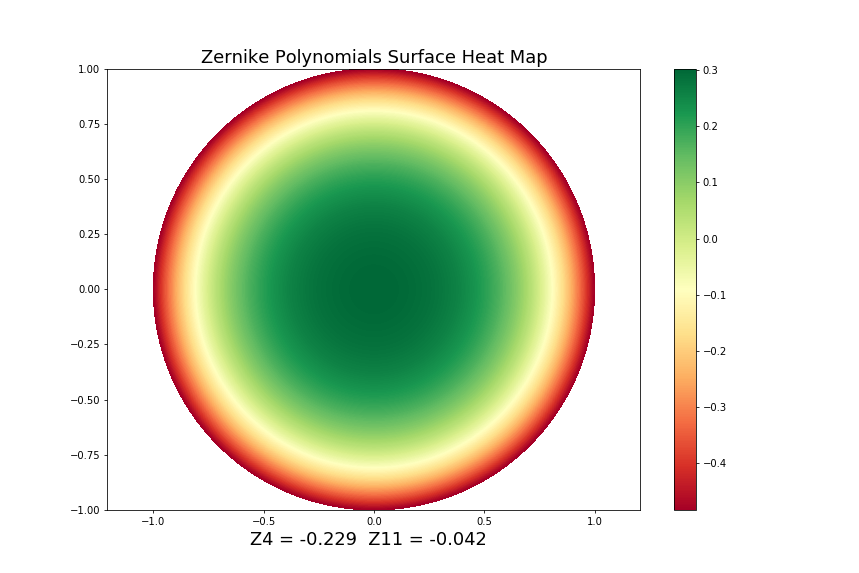

Z4 =  -0.229 Z20 Defocus
Z11 =  -0.042 Z40 Primary Spherical


In [6]:
C1.zernikemap()

### Opticspy is using Noll zernike polynomials
As opposed to ANSI (sort of used by the Active Surface Manager) or Zemax
![image](zernike_noll.PNG)

## Some more tests
How about a ramp in the x direction?

In [7]:
Z = np.array([[x for x in range(200)] for y in range(200)])

<IPython.core.display.Javascript object>


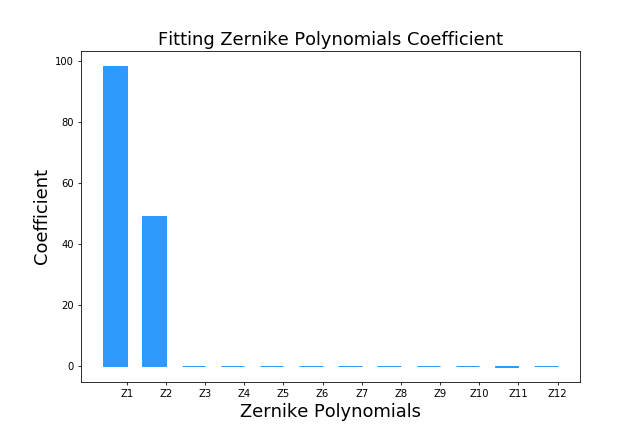

<IPython.core.display.Javascript object>


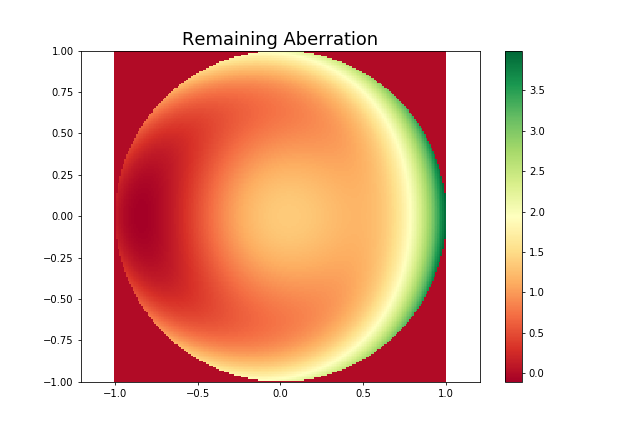

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |49.132 | 0.000 |-0.211 | 0.000 | 0.000 | 0.000 |-0.172 | 0.000 |-0.080 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.272 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

In [8]:
fitlist,C1 = opticspy.zernike.fitting(Z,12,remain2D=1,barchart=1)

As expected, the domineering coefficient is for our ramp in the X direction!  Make sure it works in the y direction too.

In [9]:
Z = np.array([[y for x in range(200)] for y in range(200)])

<IPython.core.display.Javascript object>


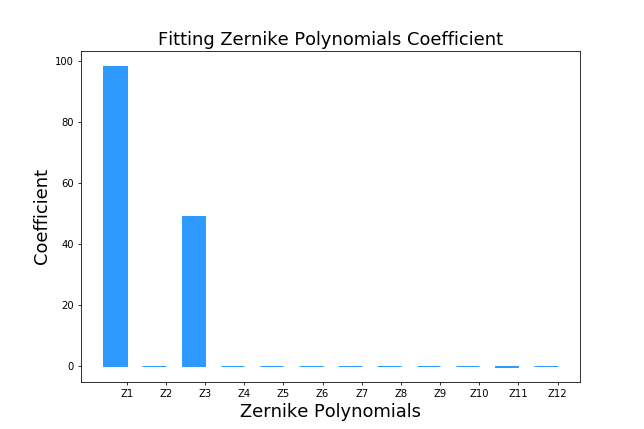

<IPython.core.display.Javascript object>


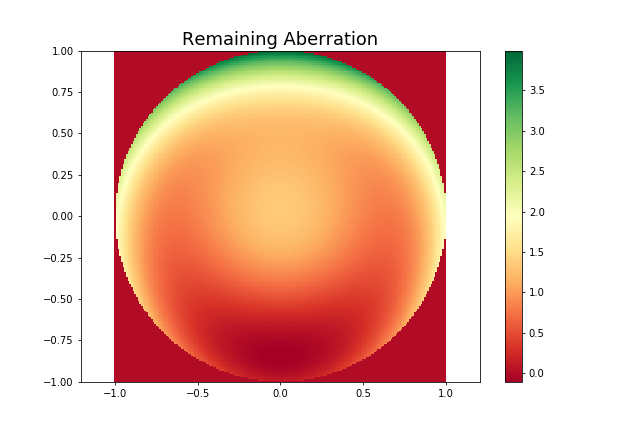

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |-0.000 |49.132 |-0.211 | 0.000 |-0.000 |-0.172 |-0.000 | 0.080 |-0.000 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.272 |-0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

In [10]:
fitlist,C1 = opticspy.zernike.fitting(Z,12,remain2D=1,barchart=1)

Excellent!  We get the Tilt term in the other direction!

### Changing the scale
How does this package behave when our surface is not on the unit circle?  Let's find out.

Radius:  10.0
Offset:  0.0
Scale:  10.0


<IPython.core.display.Javascript object>


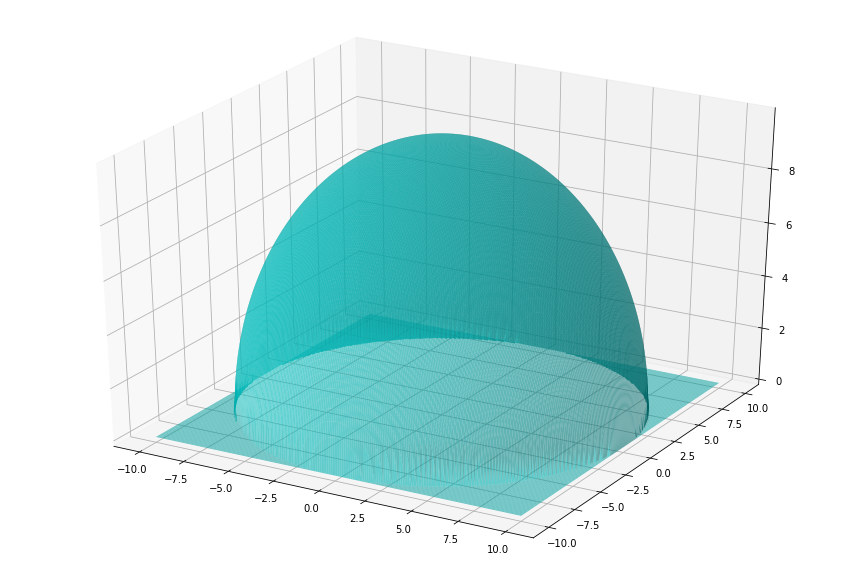

In [6]:
Z = spherical_surf(200, scale=10., radius=10.)

<IPython.core.display.Javascript object>


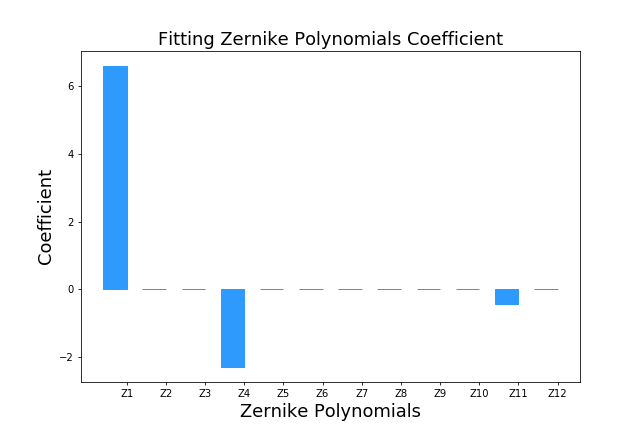

<IPython.core.display.Javascript object>


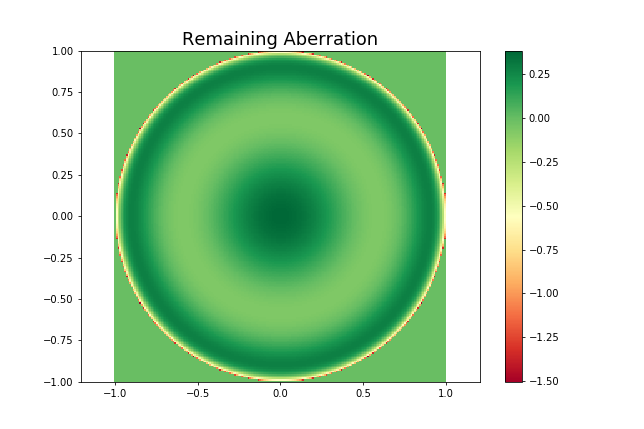

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |-0.000 |-0.000 |-2.287 |-0.000 | 0.000 |-0.000 |-0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.423 |-0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

In [7]:
fitlist,C1 = opticspy.zernike.fitting(Z,12,remain2D=1,barchart=1)

In [8]:
C1.listcoefficient()

Z4 =  -2.287 Z20 Defocus
Z11 =  -0.423 Z40 Primary Spherical


['Z4 = -2.287\nZ11 = -0.423\n', 'Z4 = -2.287  Z11 = -0.423  ']

Hey, these are the same coefficients as our original hemisphere, just scaled up by 10.0!  This makes sense to my reptilian brain.

### Changing the offset
What happens when this same hemisphere isn't centered?

Radius:  10.0
Offset:  -2.5
Scale:  10.0


<IPython.core.display.Javascript object>


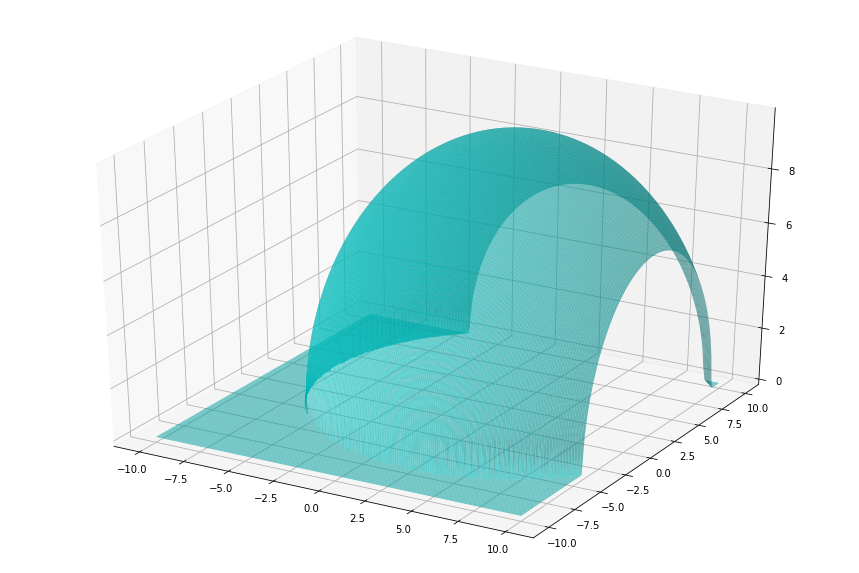

In [9]:
Z = spherical_surf(200, scale=10., radius=10., offset=-2.5)

<IPython.core.display.Javascript object>


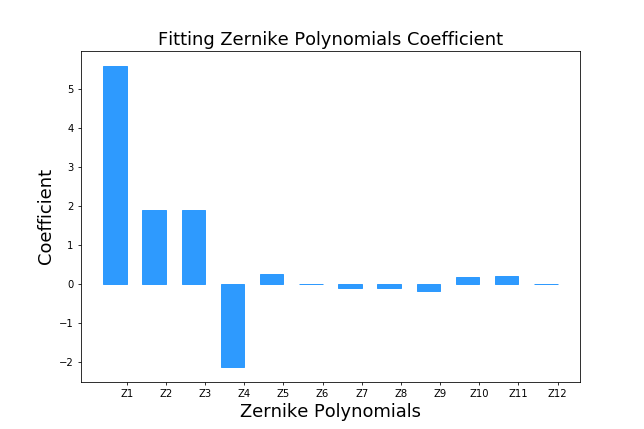

<IPython.core.display.Javascript object>


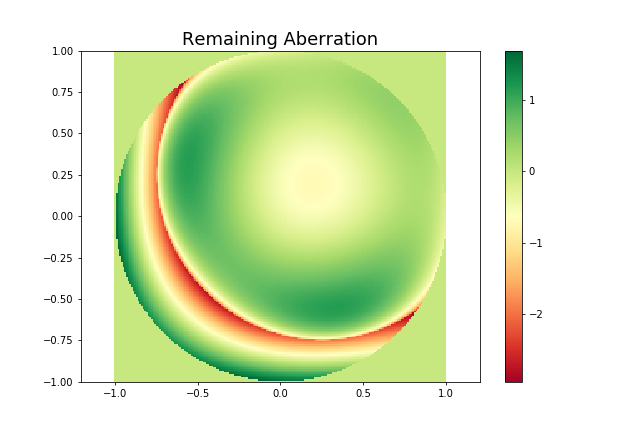

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 | 1.906 | 1.906 |-2.120 | 0.244 | 0.000 |-0.106 |-0.106 |-0.185 | 0.185 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
| 0.204 |-0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

In [10]:
fitlist,C1 = opticspy.zernike.fitting(Z,12,remain2D=1,barchart=1)

In [11]:
C1.listcoefficient()

Z2 =  1.906 Z11 x Tilt
Z3 =  1.906 Z11 y Tilt
Z4 =  -2.12 Z20 Defocus
Z5 =  0.244 Z22 Primary Astigmatism at 45
Z7 =  -0.106 Z31 Primary y Coma
Z8 =  -0.106 Z31 Primary x Coma
Z9 =  -0.185 Z33 y Trefoil
Z10 =  0.185 Z33 x Trefoil
Z11 =  0.204 Z40 Primary Spherical


['Z2 = 1.906\nZ3 = 1.906\nZ4 = -2.12\nZ5 = 0.244\nZ7 = -0.106\nZ8 = -0.106\nZ9 = -0.185\nZ10 = 0.185\nZ11 = 0.204\n',
 'Z2 = 1.906  Z3 = 1.906  Z4 = -2.12  Z5 = 0.244  Z7 = -0.106  Z8 = -0.106  Z9 = -0.185  Z10 = 0.185  Z11 = 0.204  ']

No more simple results!  And as good as fit as we've seen before either.  However, note that our symettrical surface produces symetrical zernikes as well: the X and Y TILT are the same, as is the Primary Coma and Trefoil.  What does just the surface produced by these zernikes look like?

<IPython.core.display.Javascript object>


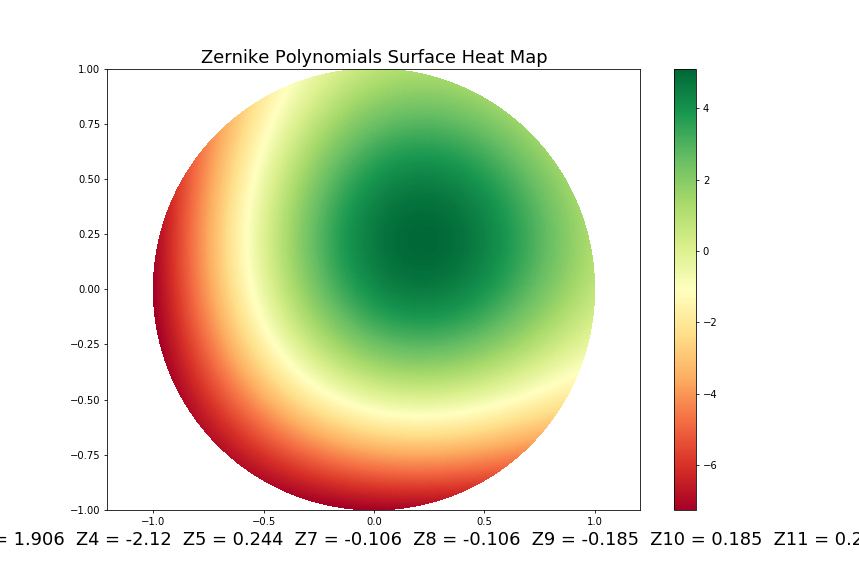

Z2 =  1.906 Z11 x Tilt
Z3 =  1.906 Z11 y Tilt
Z4 =  -2.12 Z20 Defocus
Z5 =  0.244 Z22 Primary Astigmatism at 45
Z7 =  -0.106 Z31 Primary y Coma
Z8 =  -0.106 Z31 Primary x Coma
Z9 =  -0.185 Z33 y Trefoil
Z10 =  0.185 Z33 x Trefoil
Z11 =  0.204 Z40 Primary Spherical


In [12]:
C1.zernikemap()

<IPython.core.display.Javascript object>


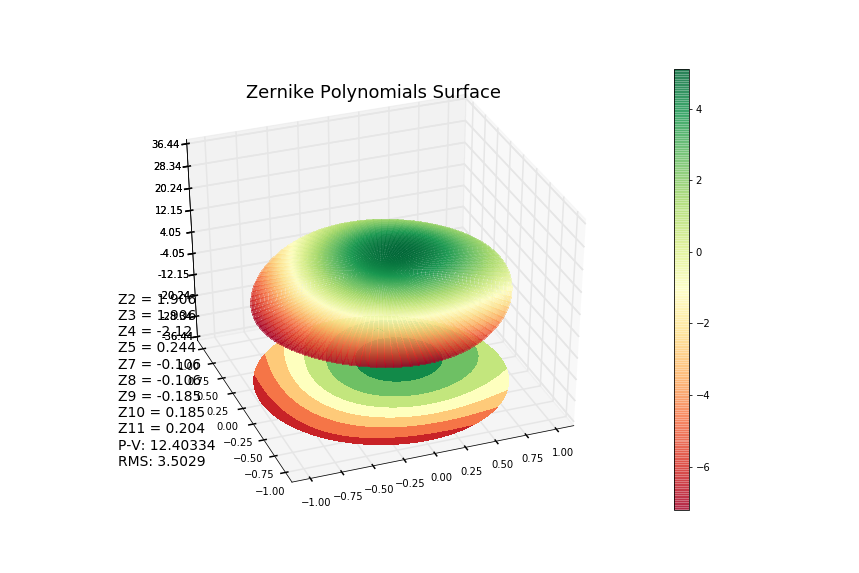

Z2 =  1.906 Z11 x Tilt
Z3 =  1.906 Z11 y Tilt
Z4 =  -2.12 Z20 Defocus
Z5 =  0.244 Z22 Primary Astigmatism at 45
Z7 =  -0.106 Z31 Primary y Coma
Z8 =  -0.106 Z31 Primary x Coma
Z9 =  -0.185 Z33 y Trefoil
Z10 =  0.185 Z33 x Trefoil
Z11 =  0.204 Z40 Primary Spherical


In [13]:
C1.zernikesurface()

### Breaking It
Cool, so far it looks like we know how this package works.  But not so fast.  What if we feed it input that is NOT EVENLY   SPACED.   The previous examples where based off surfaces with evenly spaced x and y data.  Let's try giving it a simple hemisphere to fit again, but this time the x, y elements are not spaced evenly because they are derived from evenly spaced spherical coordinates.

phi.shape:  (200, 200)


<IPython.core.display.Javascript object>


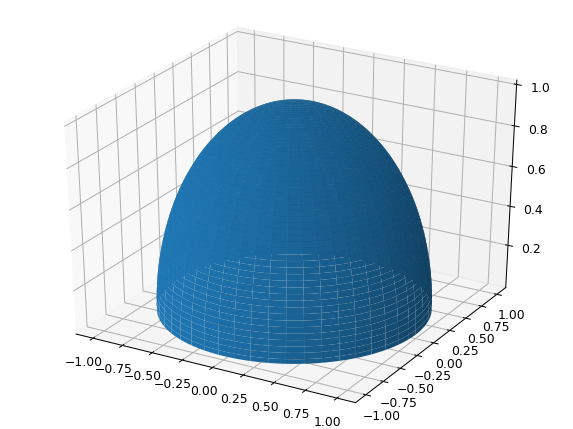

x.shape:  (200, 200)


In [16]:
from fittingExample1 import getHalfCircle
Z = getHalfCircle()

<IPython.core.display.Javascript object>


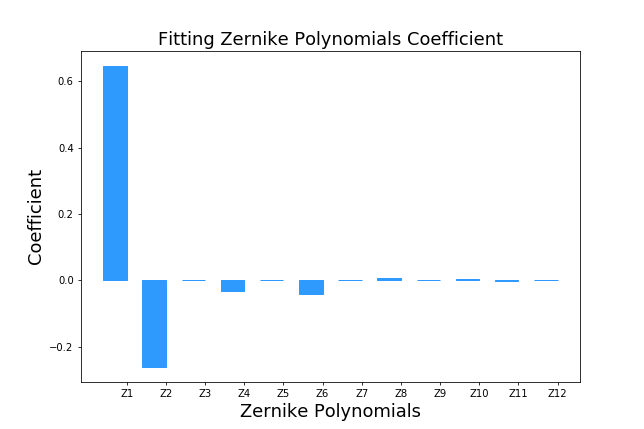

<IPython.core.display.Javascript object>


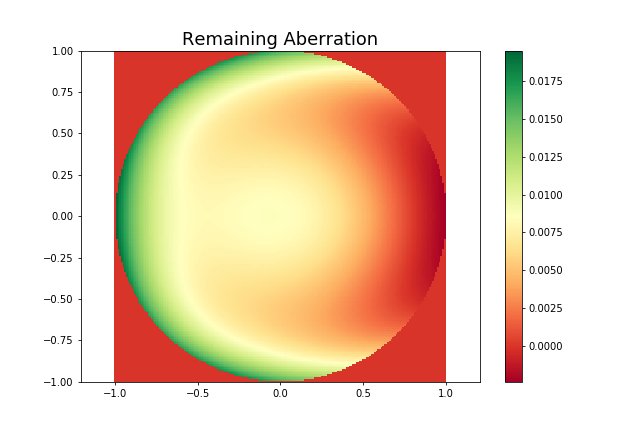

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |-0.260 | 0.000 |-0.031 |-0.000 |-0.042 | 0.000 | 0.006 | 0.000 | 0.005 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.001 | 0.001 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

In [17]:
fitlist,C1 = opticspy.zernike.fitting(Z,12,remain2D=1,barchart=1)

In [18]:
C1.listcoefficient()

Z2 =  -0.26 Z11 x Tilt
Z4 =  -0.031 Z20 Defocus
Z6 =  -0.042 Z22 Primary Astigmatism at 0
Z8 =  0.006 Z31 Primary x Coma
Z10 =  0.005 Z33 x Trefoil
Z11 =  -0.001 Z40 Primary Spherical
Z12 =  0.001 Z42 Secondary Astigmatism at 0


['Z2 = -0.26\nZ4 = -0.031\nZ6 = -0.042\nZ8 = 0.006\nZ10 = 0.005\nZ11 = -0.001\nZ12 = 0.001\n',
 'Z2 = -0.26  Z4 = -0.031  Z6 = -0.042  Z8 = 0.006  Z10 = 0.005  Z11 = -0.001  Z12 = 0.001  ']

Yeah, that doesn't match our very nice results from the original hemisphere does it?  Lesson learned: make sure your input is evenly spaced in x, y.

### Conclusions

Hopefully we've learned something about zernike polynomials, and we can use the 'opticspy' package for working with them.